In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [5]:
df_index = pd.read_csv("economic_index.csv")

In [6]:
df_index.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [15]:
#drop unnecessay column
df_index.drop(columns=["Unnamed: 0","year","month"],axis=1,inplace=True)


In [16]:
df_index.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [17]:
df_index.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

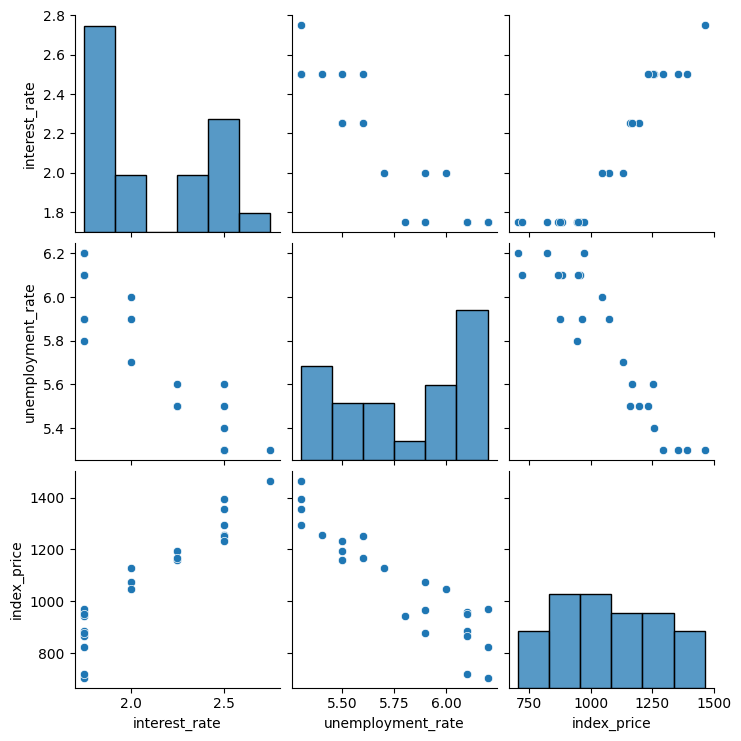

In [20]:
#Do visulization
import seaborn as sns
sns.pairplot(df_index)

In [21]:
df_index.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


Text(0, 0.5, 'unemployment_rate')

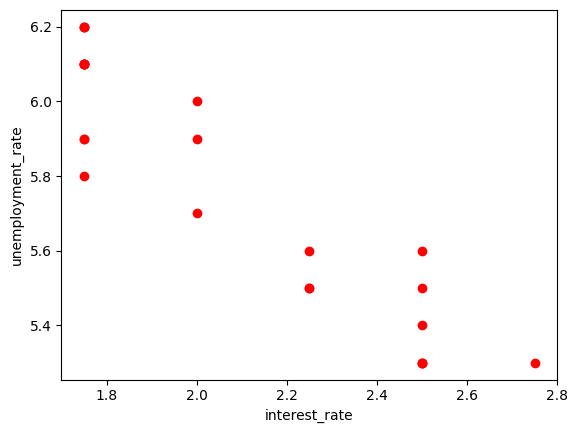

In [22]:
## Visualize the data point more closely
plt.scatter(df_index['interest_rate'],df_index['unemployment_rate'],color = 'r')
plt.xlabel("interest_rate")
plt.ylabel("unemployment_rate")

In [23]:
#independent and dependent feature 
X = df_index[["interest_rate","unemployment_rate"]]
y = df_index["index_price"]

In [24]:
df_index.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [28]:
#Train test split 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [31]:
import seaborn as snsv

<Axes: xlabel='interest_rate', ylabel='index_price'>

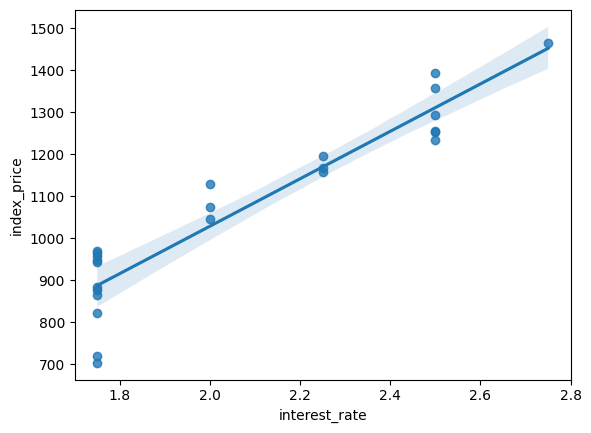

In [33]:
sns.regplot(x=df_index['interest_rate'], y=df_index['index_price'])

In [34]:
#standardization
from sklearn.preprocessing import StandardScaler

In [35]:
sclaer = StandardScaler()
X_train = sclaer.fit_transform(X_train)

X_test = sclaer.transform(X_test)

X_train



array([[-0.90115511,  0.37908503],
       [ 1.31077107, -1.48187786],
       [-0.90115511,  1.30956648],
       [ 1.31077107, -0.55139641],
       [ 1.31077107, -1.48187786],
       [-0.16384638,  0.68924552],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -1.48187786],
       [ 1.31077107, -1.17171738],
       [-0.90115511,  1.30956648],
       [-0.90115511,  0.999406  ],
       [-0.90115511,  0.37908503],
       [-0.90115511,  0.999406  ],
       [ 0.57346234, -0.8615569 ],
       [-0.16384638, -0.24123593],
       [-0.90115511,  0.06892455],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -0.8615569 ]])

In [36]:
##Apply linear regression
from sklearn.linear_model import LinearRegression

In [37]:
regression = LinearRegression()

In [38]:
regression.fit(X_train,y_train)

LinearRegression()

In [39]:
##cross validation
from sklearn.model_selection import cross_val_score
cross_val_score(regression,X_train,y_train,scoring='neg_mean_squared_error',
                
                cv=3)

array([-4921.61331265, -7686.87497294, -5135.9962549 ])

In [42]:
##preditiction
y_pred = regression.predict(X_test)

In [43]:
y_pred

array([1204.22770398,  821.65051903, 1406.51300368,  857.70889608,
        994.90992298, 1168.16932693])

In [45]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mse)

print(mse)
print(mae)
print(rmse)

5793.7628877125835
59.9357815232356
76.11677139574815


In [46]:
residual = y_test-y_pred
print(residual)

8     -45.227704
16    149.349481
0      57.486996
18     26.291104
11     80.090077
9      -1.169327
Name: index_price, dtype: float64


In [ ]:
##scatter plot 